<a href="https://colab.research.google.com/github/deannacodes/kuzushiji_recognition/blob/master/katakana_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime

In [28]:
df_unicode_to_char = pd.read_csv("https://raw.githubusercontent.com/deannacodes/kuzushiji_recognition/master/unicode_translation.csv",error_bad_lines=False)
df_unicode_to_char = df_unicode_to_char.set_index('Unicode').T.to_dict('list')

df_katakana = pd.read_csv("https://raw.githubusercontent.com/deannacodes/kuzushiji_recognition/master/all_katakana.csv",error_bad_lines=False)
print(df_katakana.shape)

(18031, 901)


In [0]:
X = df_katakana.drop(columns=["character"])
y = df_katakana["character"]

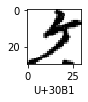

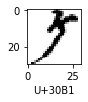

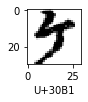

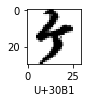

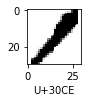

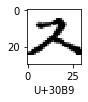

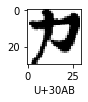

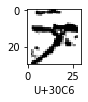

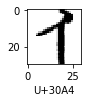

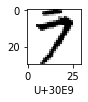

In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

for i in range(10):
  image = np.array(X.iloc[[i]]).reshape(30,30)
  plt.figure(figsize=(1,1))
  plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
  plt.xlabel(y[i])


In [31]:
X = X.astype('float32')
X /= 255

unicode_to_int = {}
i = 0
for unicode in df_katakana["character"]:
  if unicode not in unicode_to_int:
    unicode_to_int[unicode] = i
    i += 1
y = y.map(unicode_to_int)
y = np_utils.to_categorical(y, len(unicode_to_int))
print(X.head())
print(y[:2])

     0    1    2    3    4    5  ...       894       895  896  897  898  899
0  1.0  1.0  1.0  1.0  1.0  1.0  ...  0.058824  0.576471  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000  1.000000  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000  1.000000  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000  1.000000  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.000000  1.000000  1.0  1.0  1.0  1.0

[5 rows x 900 columns]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [0]:
model = Sequential()
input_size = 900
hidden_neurons_1 = 600
hidden_neurons_2 = 500
out_size = len(unicode_to_int)

model.add(Dense(hidden_neurons_1, input_dim = input_size))
model.add(Activation('sigmoid')) 
model.add(Dense(hidden_neurons_2, input_dim = hidden_neurons_1))
model.add(Activation('sigmoid'))
model.add(Dense(out_size, input_dim = hidden_neurons_2))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [35]:
fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=64, epochs=30, verbose=1)

Train on 9664 samples, validate on 4760 samples
Epoch 1/30
9664/9664 [==============================] - 5s 546us/step - loss: 1.8748 - acc: 0.5657 - val_loss: 1.0893 - val_acc: 0.7483
Epoch 2/30
9664/9664 [==============================] - 3s 283us/step - loss: 0.8619 - acc: 0.7919 - val_loss: 0.7872 - val_acc: 0.8025
Epoch 3/30
9664/9664 [==============================] - 3s 262us/step - loss: 0.6554 - acc: 0.8366 - val_loss: 0.6782 - val_acc: 0.8324
Epoch 4/30
9664/9664 [==============================] - 3s 277us/step - loss: 0.5509 - acc: 0.8587 - val_loss: 0.6053 - val_acc: 0.8466
Epoch 5/30
9664/9664 [==============================] - 2s 258us/step - loss: 0.4829 - acc: 0.8773 - val_loss: 0.5581 - val_acc: 0.8599
Epoch 6/30
9664/9664 [==============================] - 3s 259us/step - loss: 0.4222 - acc: 0.8922 - val_loss: 0.5438 - val_acc: 0.8626
Epoch 7/30
9664/9664 [==============================] - 3s 274us/step - loss: 0.3721 - acc: 0.9036 - val_loss: 0.5405 - val_acc: 0.8658


In [36]:
y_predict = model.predict(X_test, verbose=0)
score = model.evaluate(X_test, y_test, verbose=1)
print(score)

3607/3607 [==============================] - 0s 88us/step
[0.3790156312136066, 0.9226504020622175]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


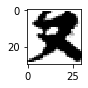

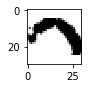

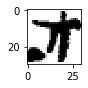

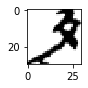

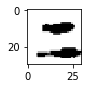

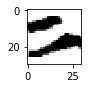

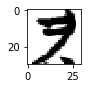

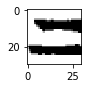

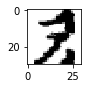

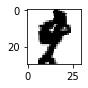

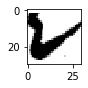

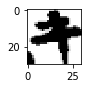

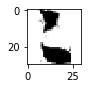

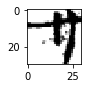

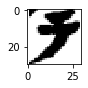

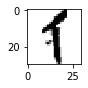

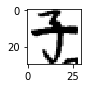

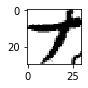

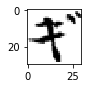

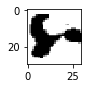

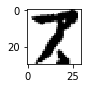

In [37]:
mistakes = []
for i in range(len(y_predict)):
  max_p = 0
  max_a = 0
  for j in range(len(unicode_to_int)):
    if y_predict[i][max_p] < y_predict[i][j]:
      max_p = j
    if y_test[i][max_a] < y_test[i][j]:
      max_a = j
  if max_p != max_a:
    mistakes.append(i)
  if len(mistakes) > 20:
    break;

X_test2 = X_test.astype('int')
X_test2 *= 255
for mistake in mistakes:
    image = np.array(X_test.iloc[[mistake]]).reshape(30,30)
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    j += 1


In [0]:
input_size = 900
hidden_neuron_tests = [i*10 for i in range(8,90)]
out_size = len(unicode_to_int)
accuracies = []

for neurons in hidden_neuron_tests:
  model = Sequential()
  model.add(Dense(neurons, input_dim = input_size))
  model.add(Activation('sigmoid')) 
  model.add(Dense(out_size, input_dim = neurons))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy',
                metrics=['accuracy'],
                optimizer='adam')
  fitted_model = model.fit(X_train, y_train, validation_split=0.33, batch_size=64, epochs=30, verbose=0)
  y_predict = model.predict(X_test, verbose=0)
  score = model.evaluate(X_test, y_test, verbose=0)
  accuracies.append((neurons,score))
  print((neurons, score))

(80, [0.447415491518037, 0.8866093704863734])
(90, [0.441611493942577, 0.889658996214125])
(100, [0.43945299831327717, 0.8915996671317851])
(110, [0.4264728511705073, 0.8965899637771968])
(120, [0.4086787879202615, 0.9013030217200857])
(130, [0.4266073188277404, 0.8971444414962121])
(140, [0.4071159547002222, 0.9037981702906622])
(150, [0.40479235376285855, 0.8993623511163951])
(160, [0.3949739689646185, 0.906293318613368])
(170, [0.40285963620675513, 0.9065705573819898])
(180, [0.39301289869604067, 0.9046298863982308])
(190, [0.40825915317192346, 0.901857499439101])
(200, [0.410870581642227, 0.899916828455342])
(210, [0.39046147958968597, 0.9096201829775437])
(220, [0.38907034067622437, 0.9071250347870355])
(230, [0.4022449624399614, 0.9032436926377457])
(240, [0.3837987620735684, 0.9126698088374929])
(250, [0.4009921313166651, 0.9051843638693754])
(260, [0.3972375846517228, 0.9062933186794669])
(270, [0.3917872347402414, 0.9112836152587798])
(280, [0.3857516086279999, 0.9110063765562

In [0]:
accuracies.sort(lambda x : x[1][1])
print(accuracies[0])